# Object tracking with event camera
In this exercise you will learn how to work with event based data similar to what you can find in a robotics and control type application. On the Canvas course page, you can find the recordings made from the week 3 Live session which covers the content you will need to know, introduces the exercise and the recordings you will use here. Please go through that material before and during your work in this exercise. 

# Installation of dv-processing

`dv-processing` is a Python library of generic algorithms for event cameras, developed by inivation.


In [1]:
!pip install dv-processing
!pip install opencv-python

## Content
1. **dataset folder:** this folder contains 14 recordings of a spinning wheel captured using and event camera. The dataset includes recordings under ideal conditions - with the camera positioned directly in front of the wheel with perfect calibration - and recordings with added noise introduced by altering the camera's position relative to the wheel. Specifically, the variations involve positioning the camera farther from the wheel, moving it closer, and shifting it away from the frontal position. For each record, there are two `aedat4` files associated, corresponding to a cropped rectangular area of 50x50 and 100x100 pixels.
2. **`exercise_utils.py`:** provides a collection of wrapper functions for the `dv-processing` library, designed to simplify the analysis of the dataset.
3. **`only_events.xml`:** this configuration file for [DV-GUI][3] allows users to preview event streams in saved in the `.aedat4` file format.
4. **`spinning_wheel_project_configuration.xml`:** this configuration file for [DV-GUI][3] enables users to preview `.aedat4` files containing event, frame, IMU, and trigger streams.
5. **`detected_angles.csv`** contains the angles extracted from `dvSave-2024_11_26_11_34_19.aedat4` as reference.

[1]: https://dv-processing.inivation.com/rel_1_7/installation.html
[2]: https://inivation.com/
[3]: https://docs.inivation.com/software/dv/gui/index.html

## Loading data

To load data originally recorded using the DVS camera, import the `exercise_utils` and use the function `load_data_from` indicating the path to the `aedat4` file.

In [3]:
import exercise_utils as utils

data = utils.load_data_from('dataset/dvSave-2024_11_26_11_34_19.aedat4')

## Extracting events

The original data contains the event, frame, IMU and trigger streams, you can use the `get_events_from` to extract the event stream. The `get_events_from` function, receives the data loaded from the `aedat4` file.

_**Note:**_ The crop files contains only an event stream.

#### Trying out functions in exercise_utils.py

In [4]:
events = utils.get_events_from(data)

In [5]:
print(events)

EventStore containing 570461 events within 3449869µs duration; time range within [1732617259260540; 1732617262710409]


In [6]:
# get resolution
resolution = utils.event_stream_resolution(data)
print(resolution)

(346, 260)


In [7]:
metadata = utils.events_info(events)
print("Event Metadata:", metadata)

Event Metadata: {'duration': datetime.timedelta(seconds=3, microseconds=449869), 'first timestamp': 1732617259260540, 'last timestamp': 1732617262710409, 'events count': 570461}


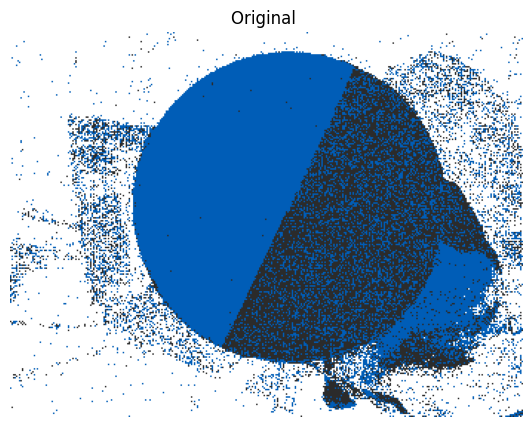

'\ncv.imshow("Event Stream", event_image)\ncv.waitKey(0)\ncv.destroyAllWindows()\n'

In [8]:
# Visualise the event stream
import dv_processing as dv
import cv2 as cv
import matplotlib.pyplot as plt

resolution = utils.event_stream_resolution(data)
visualizer = dv.visualization.EventVisualizer(resolution)

event_image = visualizer.generateImage(events)

# Display using Matplotlib
plt.figure(figsize=(10, 5))
plt.title("Original ")
#plt.imshow(event_image) 
plt.imshow(cv.cvtColor(event_image, cv.COLOR_BGR2RGB))  # Convert to RGB for Matplotlib
plt.axis('off')
plt.show()
"""
cv.imshow("Event Stream", event_image)
cv.waitKey(0)
cv.destroyAllWindows()
"""

In [9]:
# Crop area of interest
center = (173, 130)  # Example center coordinates
cropped_events = utils.crop_area('dataset/dvSave-2024_11_26_11_34_19.aedat4', center, crop_width=125, crop_height=125)

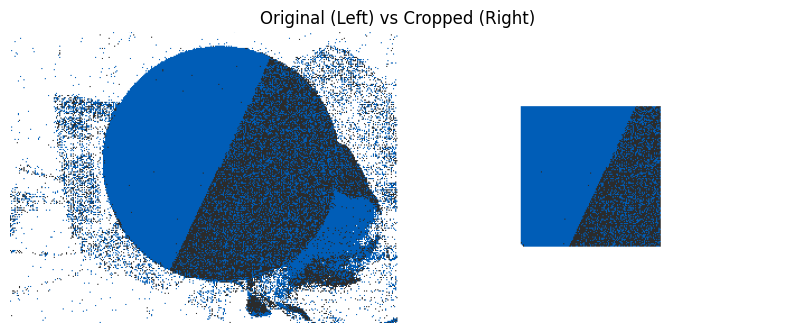

In [10]:
# Preview cropped area
utils.crop_preview_area('dataset/dvSave-2024_11_26_11_34_19.aedat4', center, crop_width=125, crop_height=125)

#### Trying out edge detection using canny and generating lines using houg transforms onevent image

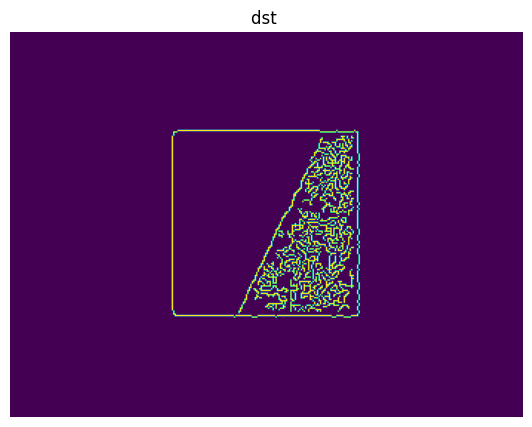

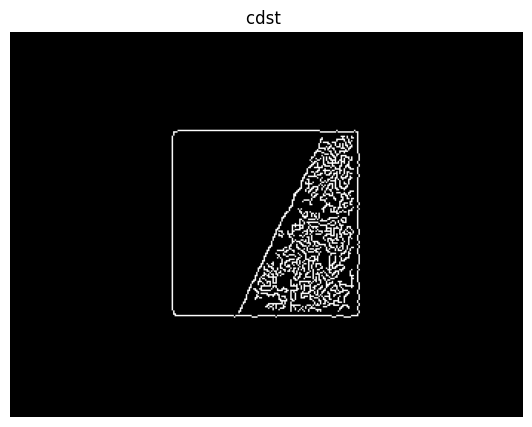

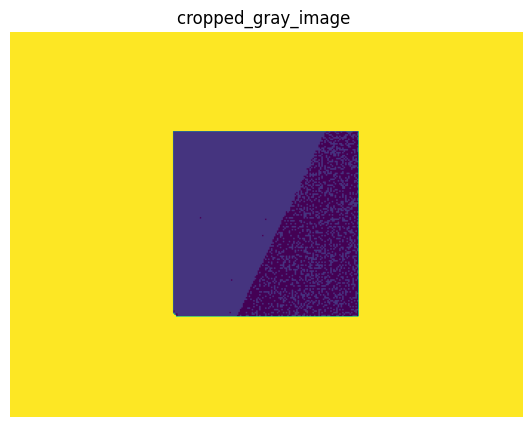

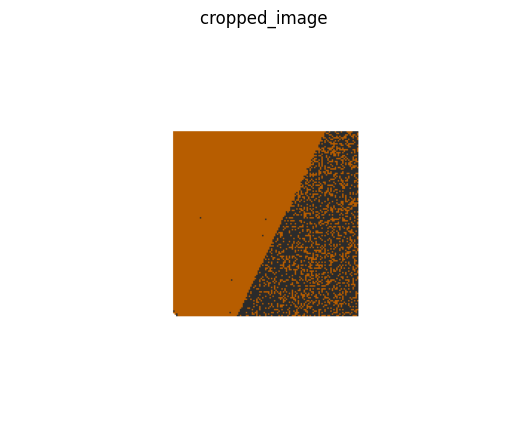

In [11]:
import exercise_utils as utils
import cv2 as cv
import dv_processing as dv
import matplotlib.pyplot as plt
import numpy as np

data_path = 'dataset/dvSave-2024_11_26_11_34_19.aedat4'
#data = utils.load_data_from('dataset/dvSave-2024_11_26_11_35_33.aedat4')
data = utils.load_data_from(data_path)
events = utils.get_events_from(data)
resolution = utils.event_stream_resolution(data)
visualizer = dv.visualization.EventVisualizer(resolution)
event_image = visualizer.generateImage(events)

# Crop area of interest
center = (173, 130)  # Example center coordinates
cropped_events = utils.crop_area(data_path, center, crop_width=125, crop_height=125)

cropped_image = visualizer.generateImage(cropped_events)
#cropped_image = cropped_image[50:200, 50:200]  # Example crop

# Convert the colored image to grayscale
cropped_gray_image = cv.cvtColor(cropped_image, cv.COLOR_BGR2GRAY)

# Edge detection
blurred_image  = cv.GaussianBlur(cropped_gray_image, (5, 5), 0)
dst = cv.Canny(blurred_image , 0, 50, None, 3, L2gradient=False)
#print(cropped_events)
#print(cropped_image)
#print(dst[0])

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

# Display using Matplotlib
plt.figure(figsize=(10, 5))
plt.title("dst ")
plt.imshow(dst) 
#plt.imshow(cv.cvtColor(event_image, cv.COLOR_BGR2RGB))  # Convert to RGB for Matplotlib
plt.axis('off')
plt.show()

# Display using Matplotlib
plt.figure(figsize=(10, 5))
plt.title("cdst ")
plt.imshow(cdst) 
#plt.imshow(cv.cvtColor(event_image, cv.COLOR_BGR2RGB))  # Convert to RGB for Matplotlib
plt.axis('off')
plt.show()

# Display using Matplotlib
plt.figure(figsize=(10, 5))
plt.title("cropped_gray_image ")
plt.imshow(cropped_gray_image) 
#plt.imshow(cv.cvtColor(event_image, cv.COLOR_BGR2RGB))  # Convert to RGB for Matplotlib
plt.axis('off')
plt.show()

# Display using Matplotlib
plt.figure(figsize=(10, 5))
plt.title("cropped_image ")
plt.imshow(cropped_image) 
#plt.imshow(cv.cvtColor(event_image, cv.COLOR_BGR2RGB))  # Convert to RGB for Matplotlib
plt.axis('off')
plt.show()

In [12]:
print(type(cropped_image))
print(cropped_image.dtype)
print(cropped_image.shape)
print(cropped_gray_image.shape)
print(dst)

<class 'numpy.ndarray'>
uint8
(260, 346, 3)
(260, 346)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
import numpy as np

#  Standard Hough Line Transform
## dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
## lines: A vector that will store the parameters (r,θ) of the detected lines
## rho : The resolution of the parameter r in pixels. We use 1 pixel.
## theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
## threshold: The minimum number of intersections to "*detect*" a line
## srn and stn: Default parameters to zero. Check OpenCV reference for more info.
lines = cv.HoughLines(dst, 1, np.pi / 180, 50, None, 0, 0)

In [14]:
print(lines.shape)
print(len(lines))
print(lines[1,0,:])
print(lines[10,0,:])

(108, 1, 2)
108
[191.          1.5707964]
[1.1100000e+02 1.7453292e-02]


In [15]:
# Draw the lines
import math
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]  ## rho : The resolution of the parameter r in pixels
        theta = lines[i][0][1]  ## theta: The resolution of the parameter θ in radians.
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho # x0 and y0 are the nearest point on the line from the center
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a))) # pt1 and pt2 are the farthest points on the line
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a))) # 1000 is just an arbitary number to get the long lines
        cv.line(cdst, pt1, pt2, (0,0,255), 2, cv.LINE_AA)

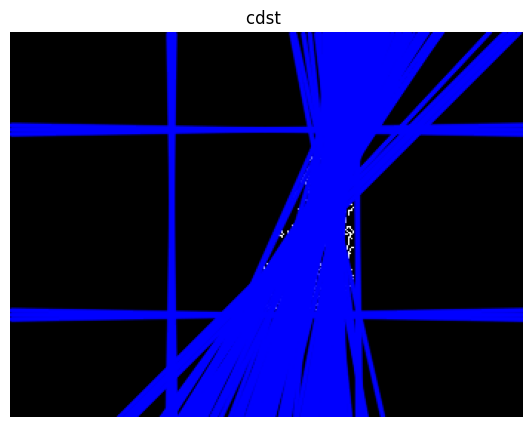

In [16]:
# Display using Matplotlib
plt.figure(figsize=(10, 5))
plt.title("cdst ")
plt.imshow(cdst) 
#plt.imshow(cv.cvtColor(event_image, cv.COLOR_BGR2RGB))  # Convert to RGB for Matplotlib
plt.axis('off')
plt.show()

### Checking events in batch 

In [131]:
import dv_processing as dv
import cv2 as cv
import math
import matplotlib.pyplot as plt
import numpy as np


# Initialize lists to store angles and their corresponding timestamps
angles_with_timestamps = []

# Open the AEDAT4 file
#file_path = "dataset/dvSave-2024_11_26_11_34_19.aedat4"
file_path = "cropped.aedat4"
reader = dv.io.MonoCameraRecording(file_path)

if not reader.isEventStreamAvailable():
    raise Exception("Event stream not available in the file.")

# Initialize visualizer for generating frames
resolution = reader.getEventResolution()
visualizer = dv.visualization.EventVisualizer(resolution)

batch_count = 0

# Process event batches
while reader.isRunning():
    event_batch = reader.getNextEventBatch()  # Get the next batch of events
    
    if event_batch is None:
        continue
    
    batch_count += 1

    print(event_batch)
    #print(event_batch.shape)
    print(len(event_batch))
    if batch_count > 10:
        break

print(batch_count)

EventStore containing 137177 events within 3445661µs duration; time range within [1732617259261877; 1732617262707538]
137177
1


# Task 1
Your first task is to estimate/calculate the angular position of the wheel in the recordings demoed in the Live session and provided in the appended datafiles, to later be used as ground thruth when training an SNN. For this you need to define a global starting angular position and create datapoints to be able to replicate this kind of figure:
![angle evolution](angles_evolution.png)

For this there are OpenCv functions which you can use, most importantly https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html and illustrated in the animated GIF below.
![fitted line](reference.gif)

In the cell below, develop a function for extracting the angular position of one of the recordings and plot the results in a similar way as the figure above.

In [18]:
## Import all the needed libraries
import exercise_utils as utils
import dv_processing as dv
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm import tqdm

In [19]:
data_path = 'dataset/dvSave-2024_11_26_11_34_19.aedat4'
data = utils.load_data_from(data_path) # Loading data
events = utils.get_events_from(data) # Extracting events
resolution = utils.event_stream_resolution(data) # get resolution
visualizer = dv.visualization.EventVisualizer(resolution)
event_image = visualizer.generateImage(events)

In [30]:
# Open the AEDAT4 file
cnt = 0
global_start_time = events[0].timestamp()
start_time = events[0].timestamp()
angles_with_timestamps = []
median_timestamp = 0
batch_timestamps = []
cnt_angles = 0

reader = dv.io.MonoCameraRecording(data_path)

if not reader.isEventStreamAvailable():
    raise Exception("Event stream not available in the file.")

while reader.isRunning():

    cnt += 1

    """
    # To test on samll sample
    if cnt > 50000:
        break
    """
    event_batch = reader.getNextEventBatch()

    # If there are no events then end the processing
    if event_batch is None or len(event_batch) == 0:
        break 

    # Generate an image for the current batch
    event_image = visualizer.generateImage(event_batch)

    # Convert the colored image to grayscale. Canny needs gray scale image
    event_image_gray = cv.cvtColor(event_image, cv.COLOR_BGR2GRAY)

    # Edge detection
    event_image_gray_blurred  = cv.GaussianBlur(event_image_gray, (5, 5), 0)
    #dst = cv.Canny(event_image_gray_blurred , 0, 50, None, 3, L2gradient=False)
    dst = cv.Canny(event_image_gray_blurred , 50, 75, None, 3, L2gradient=False)

    #  Standard Hough Line Transform
    lines = cv.HoughLines(dst, 1, np.pi / 180, 50, None, 0, 0)        

    # Threshold to exclude horizontal and vertical lines
    angle_threshold = 0.005  # Adjust this for stricter filtering

    # Get the median timestamp of the batch. Use it as the timestamp for the batch
    batch_timestamps = [event.timestamp() for event in event_batch]
    median_timestamp = sorted(batch_timestamps)[len(batch_timestamps) // 2]

    if lines is not None:
        for line in lines:
            rho, theta = line[0]  # Extract rho and theta
            
            # Filter out vertical (theta ~ 0 or pi) and horizontal (theta ~ pi/2)
            #if not ((abs(theta) < angle_threshold) and (abs(theta - math.pi) < angle_threshold) and abs((theta - math.pi/2) < angle_threshold)):
            if not (abs(theta) < angle_threshold or abs(theta - math.pi) < angle_threshold or abs(theta - math.pi/2) < angle_threshold):
                unwrapped_theta = np.unwrap([theta])[0] # to solve Angular Discontinuities
                normalized_unwrapped_theta = (unwrapped_theta + np.pi) / (2 * np.pi) # normalized_unwrapped_theta 
                angle_degrees = math.degrees(unwrapped_theta)
                # Save timesteps and angles
                cnt_angles += 1  # cnt_angles will serve as timesteps.
                angles_with_timestamps.append((cnt_angles,(median_timestamp - global_start_time), angle_degrees, normalized_unwrapped_theta))  # Store angle and timestamp

"""
# Print or save the results
for timestamp, angle  in angles_with_timestamps:
    print(f"Timestamp: {timestamp} ms, Angle: {angle:.2f} degrees, ")
""" 

# save to a file
with open('angles_with_timestamps.csv', 'w') as f:
    for timestep, timestamp, angle, normalized_unwrapped_theta in angles_with_timestamps:
        f.write(f"{timestep}, {timestamp}, {angle:.2f}, {normalized_unwrapped_theta}\n")


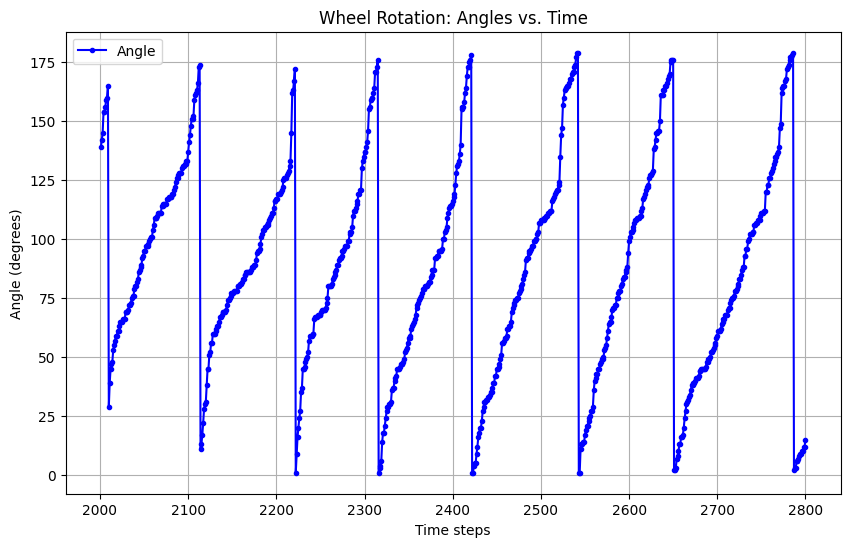

In [31]:
# Plot angle vs timesteps
angles_plot = [angle for _, _, angle,_ in angles_with_timestamps]
timesteps_plot = [timestep for timestep, _, _,_ in angles_with_timestamps]   

# Plot angles vs. timestamps (plotting only for a small window)
plt.figure(figsize=(10, 6))
plt.plot(timesteps_plot[2000:2800], angles_plot[2000:2800], marker='.', linestyle='-', color='b', label='Angle')

# Add labels, title, and grid
plt.xlabel('Time steps')
plt.ylabel('Angle (degrees)')
plt.title('Wheel Rotation: Angles vs. Time')
plt.grid(True)
plt.legend()
plt.show()

# Task 2
Perception is a key component of neuromorphic feedback control systems, similarly to what was shown in the Live session and which can be found here: https://arxiv.org/pdf/2108.03694. Here your task is to train an SNN which can estimate the position (angle) of the spinning wheel using events from a few pixels at the centre of the wheel as input to the network.  **Optionally** you can also estimate the angular velocity of the disk. 

The number of pixels processed should be kept low to enable simulations on a regular PC/laptop, and also makes the problem more challenging compared to the approach in the first task where all event data is processed. By extracting a small region of pixels in the centre of the wheel you imitate the difficulty of identifying the angle of a wheel at great distance, where the size of the wheel only covers a small number of pixels. What factors determine the obtained precision and latency of the angle estimation? What are the options of output layers and definitions of the angle? How do you treat the discontinous nature of the angular position? 

Thus, use the angle estimated in Task 1 as the ground truth for training an SNN that solves the regression problem. Remember to split the data into training and validation set of a suitable fraction (you do not need a test set for this exercise). Then plot the results of a given recoding together with the calculated ground thruth as a function of time. Also, calculate the RMS error and asses that your solution is reasonably accurate.

For this you can use what you learnt in the previous snnTorch exercise. Have a look at this tutorial (https://tonic.readthedocs.io/en/latest/tutorials/davis_data.html) on how to read your data into a similar format as used previouly with the pre-processing functionality used there (Hint: splice the recorded event stream into set time bins with corresponding ground truth from Task 1). The recordings have to be cropped quite heavily, as even an 50x50 input for example will result in 2500 input neurons which can be difficult to handle on a PC/laptop. In the exercise_utils.py file, there is a `crop_area` function which will achive this **where you need to give the center point of the circle**. To assist, the  `crop_preview_area` function can bee used for previewing the cropping of the recordings so you can check that your cropping is suitable.


In [113]:
### Import needed libraries
import torch
import snntorch as snn
from snntorch import spikegen
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML

In [114]:
# Check for CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


#### Define the SNN Model

In [116]:
class SNNModel(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(SNNModel, self).__init__()
        self.fc1 = torch.nn.Linear(num_inputs, 128)
        self.lif1 = snn.Leaky(beta=0.9)
        self.fc2 = torch.nn.Linear(128, num_outputs)

    def forward(self, x):
        
        spk_rec, mem_rec = [], [] # not used yet
        mem = self.lif1.init_leaky()  # Initialise mebrane potential on every forward pass

        batch_size, num_steps, num_features = x.shape  # Shape [64, 100, 100]

        # Flatten time steps and features
        x = x.view(batch_size * num_steps, num_features)

        # Fully connected layer 1
        x = self.fc1(x)

        # LIF layer        
        spk, mem = self.lif1(x, mem)  # Pass out of prev layer and initialised membrane potential
        mem = mem.view(batch_size, num_steps, -1)  # Reshape back to batch size and time steps  

        # Aggregate over time steps
        mem_mean = mem.mean(1)  # Average across time steps

        # Final output
        output = self.fc2(mem_mean)
        return output


#### Hyperparameters

In [117]:
num_epochs = 2000
batch_size = 64
num_steps = 100  # Number of timesteps per segment
lr = 1e-3
num_inputs = num_steps
num_outputs = 1
validation_split = 0.2

#### Preparing the data for the model

In [118]:
# load csv created in task 1.
df = pd.read_csv("angles_with_timestamps.csv", header=None)
df.columns = ['timesteps', 'timestamps','angles','normalized_unwrapped_theta']
timesteps = np.array(df['timesteps'] )
angles = np.array(df['normalized_unwrapped_theta'])

# Split time series into windows
num_segments = len(timesteps) // num_steps  # Number of full segments
time_series_segments = angles[:num_segments * num_steps].reshape(num_segments, num_steps)  # Shape [340, 100]

# Convert NumPy array to PyTorch tensor and move to the correct device
time_series_segments = torch.tensor(time_series_segments, dtype=torch.float32).to(device)

# Generate spikes from time_series_segments
X_spikes = spikegen.rate(time_series_segments, num_steps)   # Spike encoding, shape [100, 340, 100]

# Adjust the dimensions, Transpose to move num_segments to the first dimension
X_spikes = X_spikes.transpose(0, 1)  # Shape becomes [340, 100, 100]

# Create target which is mean angle per window
y_targets = torch.mean(time_series_segments, axis=1)   

# Split data
train_spikes, val_spikes, train_targets, val_targets = train_test_split(
    X_spikes, y_targets, test_size=0.2, random_state=42
)

# Create DataLoaders
train_dataset = TensorDataset(train_spikes, train_targets)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,drop_last=True) # drop_last=True is for dropping the last samples that could not make the full segment

val_dataset = TensorDataset(val_spikes, val_targets)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [119]:
print(time_series_segments.shape)
print(len(X_spikes[0]))
print(X_spikes.shape)
print(y_targets.shape)

torch.Size([340, 100])
100
torch.Size([340, 100, 100])
torch.Size([340])


In [120]:
print(len(train_spikes))
print(len(train_targets))
print(len(val_spikes))
print(len(val_targets))
print(len(train_loader))
print(len(val_loader))

272
272
68
68
4
2


In [121]:
# initialise model and set loss function and optimiser 
model = SNNModel(num_inputs, num_outputs).to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

#### Training for 2000 epochs

In [122]:
# Training Loop
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred.squeeze(), y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred.squeeze(), y_batch)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_losses[-1]:.6f}, Val Loss: {val_losses[-1]:.6f}")


Epoch 1/2000, Train Loss: 0.190549, Val Loss: 0.205647
Epoch 2/2000, Train Loss: 0.080692, Val Loss: 0.037430
Epoch 3/2000, Train Loss: 0.069960, Val Loss: 0.029996
Epoch 4/2000, Train Loss: 0.017311, Val Loss: 0.042536
Epoch 5/2000, Train Loss: 0.032947, Val Loss: 0.005518
Epoch 6/2000, Train Loss: 0.008230, Val Loss: 0.020880
Epoch 7/2000, Train Loss: 0.013474, Val Loss: 0.002368
Epoch 8/2000, Train Loss: 0.007308, Val Loss: 0.012089
Epoch 9/2000, Train Loss: 0.005298, Val Loss: 0.003540
Epoch 10/2000, Train Loss: 0.005609, Val Loss: 0.003234
Epoch 11/2000, Train Loss: 0.002574, Val Loss: 0.005449
Epoch 12/2000, Train Loss: 0.003445, Val Loss: 0.001833
Epoch 13/2000, Train Loss: 0.002376, Val Loss: 0.002598
Epoch 14/2000, Train Loss: 0.001830, Val Loss: 0.002805
Epoch 15/2000, Train Loss: 0.002059, Val Loss: 0.001827
Epoch 16/2000, Train Loss: 0.001643, Val Loss: 0.001874
Epoch 17/2000, Train Loss: 0.001452, Val Loss: 0.001947
Epoch 18/2000, Train Loss: 0.001516, Val Loss: 0.001605
E

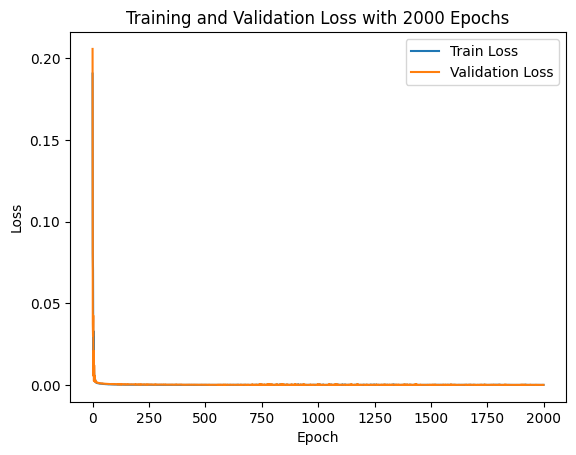

In [123]:
# Plot Losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss with 2000 Epochs')
plt.show()

RMS Error: 0.3127646235873974


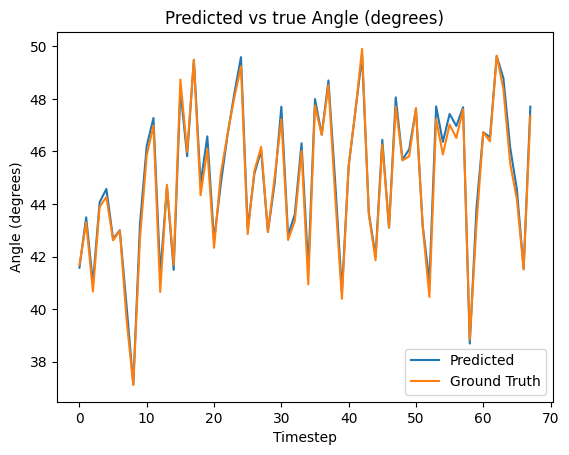

In [124]:
import math
# Evaluate on validation data
predictions = []
predicted_angles = []
true_angles = [] 
ground_truth = []

model.eval()
with torch.no_grad():
    for data, target in val_loader:
        output = model(data).cpu().numpy()
        predictions.extend(output)
        target = target.cpu().numpy()
        ground_truth.extend(target)

# Convert radians to degrees
predicted_angles = np.degrees(predictions)
predicted_angles = [angles.item() for angles in predicted_angles]
true_angles = np.degrees(ground_truth)


display(HTML("<h3><b>Result after training for {} epochs</b></h3>".format(num_epochs)))

# RMS Error
rms_error = np.sqrt(np.mean((predicted_angles - true_angles) ** 2))
print(f"RMS Error: {rms_error}")



# Plot results
import matplotlib.pyplot as plt
plt.plot(predicted_angles, label="Predicted")
plt.plot(true_angles, label="Ground Truth")
plt.xlabel("Timestep")
plt.ylabel("Angle (degrees)")
plt.title("Predicted vs true Angle (degrees)")
plt.legend()
plt.show()

#### Training with 100 epochs

In [125]:
num_epochs = 100
batch_size = 64
num_steps = 100  # Number of timesteps per segment
lr = 1e-3
num_inputs = num_steps
num_outputs = 1
validation_split = 0.2

In [126]:
# initialise model and set loss function and optimiser 
model = SNNModel(num_inputs, num_outputs).to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [127]:
# Training Loop
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred.squeeze(), y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred.squeeze(), y_batch)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_losses[-1]:.6f}, Val Loss: {val_losses[-1]:.6f}")


Epoch 1/100, Train Loss: 0.234804, Val Loss: 0.251028
Epoch 2/100, Train Loss: 0.127045, Val Loss: 0.011107
Epoch 3/100, Train Loss: 0.066532, Val Loss: 0.078424
Epoch 4/100, Train Loss: 0.031113, Val Loss: 0.014072
Epoch 5/100, Train Loss: 0.033846, Val Loss: 0.027304
Epoch 6/100, Train Loss: 0.011036, Val Loss: 0.010592
Epoch 7/100, Train Loss: 0.017158, Val Loss: 0.011340
Epoch 8/100, Train Loss: 0.005003, Val Loss: 0.006658
Epoch 9/100, Train Loss: 0.008919, Val Loss: 0.003450
Epoch 10/100, Train Loss: 0.002902, Val Loss: 0.005513
Epoch 11/100, Train Loss: 0.004740, Val Loss: 0.001359
Epoch 12/100, Train Loss: 0.001859, Val Loss: 0.002973
Epoch 13/100, Train Loss: 0.002613, Val Loss: 0.001093
Epoch 14/100, Train Loss: 0.002114, Val Loss: 0.001898
Epoch 15/100, Train Loss: 0.001445, Val Loss: 0.001234
Epoch 16/100, Train Loss: 0.001639, Val Loss: 0.000940
Epoch 17/100, Train Loss: 0.001303, Val Loss: 0.001322
Epoch 18/100, Train Loss: 0.001320, Val Loss: 0.000873
Epoch 19/100, Train

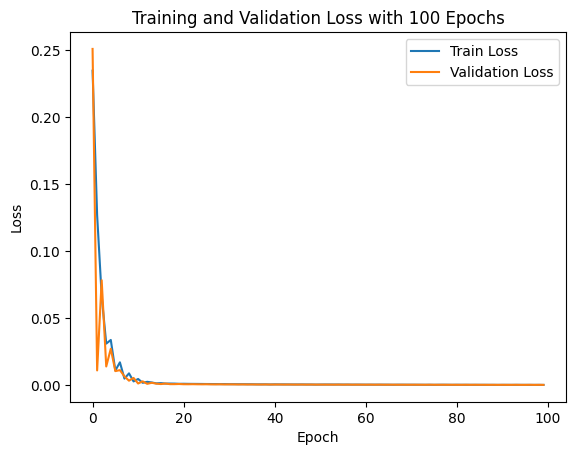

In [128]:
# Plot Losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss with 100 Epochs')
plt.show()

RMS Error: 1.0547441746900033


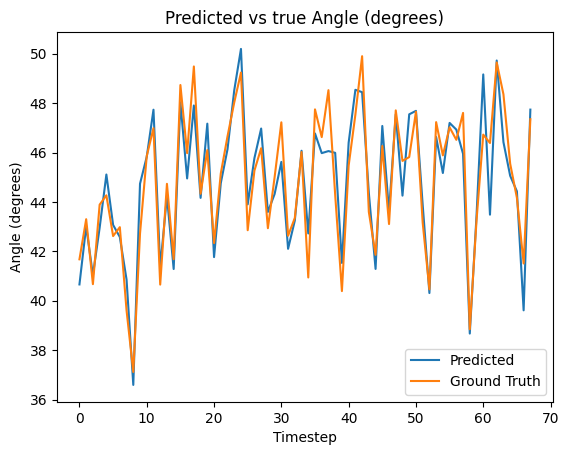

In [129]:
import math
# Evaluate on validation data
predictions = []
predicted_angles = []
true_angles = [] 
ground_truth = []

model.eval()
with torch.no_grad():
    for data, target in val_loader:
        output = model(data).cpu().numpy()
        predictions.extend(output)
        target = target.cpu().numpy()
        ground_truth.extend(target)

# Convert radians to degrees
predicted_angles = np.degrees(predictions)
predicted_angles = [angles.item() for angles in predicted_angles]
true_angles = np.degrees(ground_truth)


display(HTML("<h3><b>Result after training for {} epochs</b></h3>".format(num_epochs)))

# RMS Error
rms_error = np.sqrt(np.mean((predicted_angles - true_angles) ** 2))
print(f"RMS Error: {rms_error}")



# Plot results
import matplotlib.pyplot as plt
plt.plot(predicted_angles, label="Predicted")
plt.plot(true_angles, label="Ground Truth")
plt.xlabel("Timestep")
plt.ylabel("Angle (degrees)")
plt.title("Predicted vs true Angle (degrees)")
plt.legend()
plt.show()

## Cropped events - Data preprocessing and training 

In [115]:
### Import needed libraries
import exercise_utils as utils
import cv2 as cv
import dv_processing as dv
import matplotlib.pyplot as plt
import numpy as np
import math

import torch
import snntorch as snn
from snntorch import spikegen
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML

In [116]:
data_path = 'dataset/dvSave-2024_11_26_11_34_19.aedat4'
data = utils.load_data_from(data_path) # Loading data
events = utils.get_events_from(data) # Extracting events
resolution = utils.event_stream_resolution(data) # get resolution
visualizer = dv.visualization.EventVisualizer(resolution)


# Crop area of interest
center = (173, 130)  # Example center coordinates
#cropped_events = utils.crop_area(data_path, center, crop_width=100, crop_height=100)
cropped_events = utils.crop_area_all_event_streams(data_path, center, crop_width=100, crop_height=100)
utils.events_to_aedat4_file(cropped_events, resolution = (100,100), file_name = 'cropped.aedat4') # Save it to file

data_path_cropped = 'cropped.aedat4'
data_cropped = utils.load_data_from(data_path_cropped) # Loading data
cropped_events_extract = utils.get_events_from(data_cropped) # Extracting events
resolution = utils.event_stream_resolution(data) # get resolution
visualizer = dv.visualization.EventVisualizer(resolution)
event_image = visualizer.generateImage(cropped_events_extract)

In [117]:
event_info = {}
event_info = utils.events_info(cropped_events_extract)
print(event_info)

{'duration': datetime.timedelta(seconds=3, microseconds=445661), 'first timestamp': 1732617259261877, 'last timestamp': 1732617262707538, 'events count': 137177}


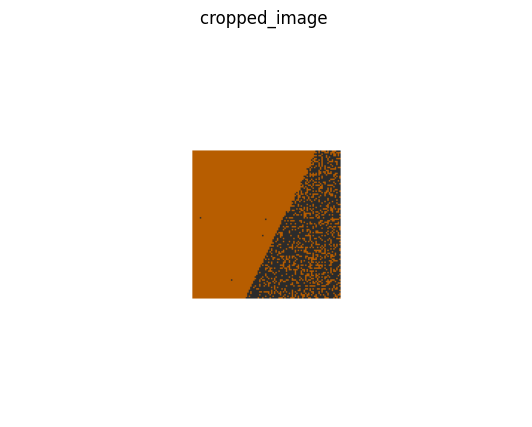

In [118]:
# Display using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title("cropped_image ")
plt.imshow(event_image) 
#plt.imshow(cv.cvtColor(event_image, cv.COLOR_BGR2RGB))  # Convert to RGB for Matplotlib
plt.axis('off')
plt.show()

In [119]:
# Open the AEDAT4 file
cnt = 0
global_start_time = events[0].timestamp()
start_time = events[0].timestamp()
angles_with_timestamps = []
median_timestamp = 0
batch_timestamps = []
cnt_angles = 0

reader = dv.io.MonoCameraRecording(data_path_cropped)  # data path for the cropped event

if not reader.isEventStreamAvailable():
    raise Exception("Event stream not available in the file.")

while reader.isRunning():

    cnt += 1

    """
    # To test on samll sample
    if cnt > 50000:
        break
    """
    event_batch = reader.getNextEventBatch()

    # If there are no events then end the processing
    if event_batch is None or len(event_batch) == 0:
        break 

    # Generate an image for the current batch
    event_image = visualizer.generateImage(event_batch)
    """
    plt.figure(figsize=(10, 5))
    plt.title("cropped_image ")
    plt.imshow(event_image) 
    #plt.imshow(cv.cvtColor(event_image, cv.COLOR_BGR2RGB))  # Convert to RGB for Matplotlib
    plt.axis('off')
    plt.show()
    """

    # Convert the colored image to grayscale. Canny needs gray scale image
    event_image_gray = cv.cvtColor(event_image, cv.COLOR_BGR2GRAY)
    """
    plt.figure(figsize=(10, 5))
    plt.title("cropped_image gray ")
    plt.imshow(event_image_gray) 
    #plt.imshow(cv.cvtColor(event_image, cv.COLOR_BGR2RGB))  # Convert to RGB for Matplotlib
    plt.axis('off')
    plt.show()
    """
    # Edge detection
    event_image_gray_blurred  = cv.GaussianBlur(event_image_gray, (5, 5), 0)
    #dst = cv.Canny(event_image_gray_blurred , 0, 50, None, 3, L2gradient=False)
    dst = cv.Canny(event_image_gray_blurred , 50, 75, None, 3, L2gradient=False)

    #  Standard Hough Line Transform
    lines = cv.HoughLines(dst, 1, np.pi / 180, 50, None, 0, 0)        

    # Threshold to exclude horizontal and vertical lines
    angle_threshold = 0.005  # Adjust this for stricter filtering

    # Get the median timestamp of the batch. Use it as the timestamp for the batch
    batch_timestamps = [event.timestamp() for event in event_batch]
    median_timestamp = sorted(batch_timestamps)[len(batch_timestamps) // 2]
    """
    print(median_timestamp)

    print(lines)
    """
    if lines is not None:
        for line in lines:
            rho, theta = line[0]  # Extract rho and theta
            
            # Filter out vertical (theta ~ 0 or pi) and horizontal (theta ~ pi/2)
            #if not ((abs(theta) < angle_threshold) and (abs(theta - math.pi) < angle_threshold) and abs((theta - math.pi/2) < angle_threshold)):
            if not (abs(theta) < angle_threshold or abs(theta - math.pi) < angle_threshold or abs(theta - math.pi/2) < angle_threshold):
                unwrapped_theta = np.unwrap([theta])[0] # to solve Angular Discontinuities
                normalized_unwrapped_theta = (unwrapped_theta + np.pi) / (2 * np.pi) # normalized_unwrapped_theta 
                angle_degrees = math.degrees(unwrapped_theta)
                # Save timesteps and angles
                cnt_angles += 1  # cnt_angles will serve as timesteps.
                angles_with_timestamps.append((cnt_angles,(median_timestamp - global_start_time), angle_degrees, normalized_unwrapped_theta))  # Store angle and timestamp

""" 
# Print or save the results
for timestep, timestamp, angle, normalized_unwrapped_theta in angles_with_timestamps:
    print(f"Timestamp: {timestamp} ms, Angle: {angle:.2f} degrees, ")
""" 

# save to a file
with open('angles_with_timestamps_croppedImage.csv', 'w') as f:
    for timestep, timestamp, angle, normalized_unwrapped_theta in angles_with_timestamps:
        f.write(f"{timestep}, {timestamp}, {angle:.2f}, {normalized_unwrapped_theta}\n")


In [120]:
print(cnt_angles)

335


In [121]:
print(cnt)

346


### Training with cropped image for 100 epochs

In [122]:
# Check for CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [124]:
num_epochs = 500
batch_size = 2  # Reducd the batch size since we have less data for the cropped events
num_steps = 10  # Number of timesteps per segment, reduced to 10 for cropped data
lr = 1e-3
num_inputs = num_steps
num_outputs = 1
validation_split = 0.2

#### Preparing the cropped data for the model

In [125]:
# load csv created in task 1.
df = pd.read_csv("angles_with_timestamps_croppedImage.csv", header=None)
df.columns = ['timesteps', 'timestamps','angles','normalized_unwrapped_theta']
timesteps = np.array(df['timesteps'] )
angles = np.array(df['normalized_unwrapped_theta'])

# Split time series into windows
num_segments = len(timesteps) // num_steps  # Number of full segments
time_series_segments = angles[:num_segments * num_steps].reshape(num_segments, num_steps)  # Shape [340, 100]

# Convert NumPy array to PyTorch tensor and move to the correct device
time_series_segments = torch.tensor(time_series_segments, dtype=torch.float32).to(device)

# Generate spikes from time_series_segments
X_spikes = spikegen.rate(time_series_segments, num_steps)   # Spike encoding, shape [100, 340, 100]

# Adjust the dimensions, Transpose to move num_segments to the first dimension
X_spikes = X_spikes.transpose(0, 1)  # Shape becomes [340, 100, 100]

# Create target which is mean angle per window
y_targets = torch.mean(time_series_segments, axis=1)   

# Split data
train_spikes, val_spikes, train_targets, val_targets = train_test_split(
    X_spikes, y_targets, test_size=0.2, random_state=42
)

# Create DataLoaders
train_dataset = TensorDataset(train_spikes, train_targets)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,drop_last=True) # drop_last=True is for dropping the last samples that could not make the full segment

val_dataset = TensorDataset(val_spikes, val_targets)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [126]:
print(time_series_segments.shape)
print(len(X_spikes[0]))
print(X_spikes.shape)
print(y_targets.shape)

torch.Size([33, 10])
10
torch.Size([33, 10, 10])
torch.Size([33])


In [127]:
print(len(train_spikes))
print(len(train_targets))
print(len(val_spikes))
print(len(val_targets))
print(len(train_loader))
print(len(val_loader))

26
26
7
7
13
4


In [128]:
class SNNModel(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(SNNModel, self).__init__()
        self.fc1 = torch.nn.Linear(num_inputs, 128)
        self.lif1 = snn.Leaky(beta=0.9)
        self.fc2 = torch.nn.Linear(128, num_outputs)

    def forward(self, x):
        
        spk_rec, mem_rec = [], [] # not used yet
        mem = self.lif1.init_leaky()  # Initialise mebrane potential on every forward pass

        batch_size, num_steps, num_features = x.shape  # Shape [64, 100, 100]

        # Flatten time steps and features
        x = x.view(batch_size * num_steps, num_features)

        # Fully connected layer 1
        x = self.fc1(x)

        # LIF layer        
        spk, mem = self.lif1(x, mem)  # Pass out of prev layer and initialised membrane potential
        mem = mem.view(batch_size, num_steps, -1)  # Reshape back to batch size and time steps  

        # Aggregate over time steps
        mem_mean = mem.mean(1)  # Average across time steps

        # Final output
        output = self.fc2(mem_mean)
        return output


In [137]:
# initialise model and set loss function and optimiser 
model = SNNModel(num_inputs, num_outputs).to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

In [138]:
num_epochs = 100

# Training Loop
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        y_pred_reduced = y_pred.squeeze()
        loss = criterion(y_pred_reduced, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            y_pred_reduced = y_pred.squeeze()
            loss = criterion(y_pred_reduced, y_batch)         
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    # Scheduler Step
    if scheduler:
        scheduler.step(val_losses[-1])    
        current_lr = scheduler.get_last_lr()[0]    
        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_losses[-1]:.6f}, Val Loss: {val_losses[-1]:.6f}, Learning rate: {current_lr:.8f}")
    else:
        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_losses[-1]:.6f}, Val Loss: {val_losses[-1]:.6f}")


Epoch 1/100, Train Loss: 0.201286, Val Loss: 0.025938, Learning rate: 0.00100000
Epoch 2/100, Train Loss: 0.038786, Val Loss: 0.007667, Learning rate: 0.00100000
Epoch 3/100, Train Loss: 0.009122, Val Loss: 0.010430, Learning rate: 0.00100000
Epoch 4/100, Train Loss: 0.004667, Val Loss: 0.005685, Learning rate: 0.00100000
Epoch 5/100, Train Loss: 0.003783, Val Loss: 0.005025, Learning rate: 0.00100000
Epoch 6/100, Train Loss: 0.002626, Val Loss: 0.004453, Learning rate: 0.00100000
Epoch 7/100, Train Loss: 0.002542, Val Loss: 0.004597, Learning rate: 0.00100000
Epoch 8/100, Train Loss: 0.002738, Val Loss: 0.004108, Learning rate: 0.00100000
Epoch 9/100, Train Loss: 0.002217, Val Loss: 0.003900, Learning rate: 0.00100000
Epoch 10/100, Train Loss: 0.002255, Val Loss: 0.003724, Learning rate: 0.00100000
Epoch 11/100, Train Loss: 0.002336, Val Loss: 0.003608, Learning rate: 0.00100000
Epoch 12/100, Train Loss: 0.001705, Val Loss: 0.003397, Learning rate: 0.00100000
Epoch 13/100, Train Loss:

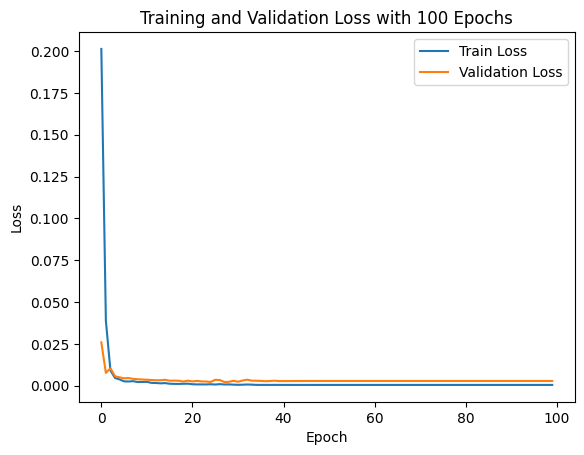

In [139]:
# Plot Losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss with 100 Epochs')
plt.show()

RMS Error: 2.8258797339294293


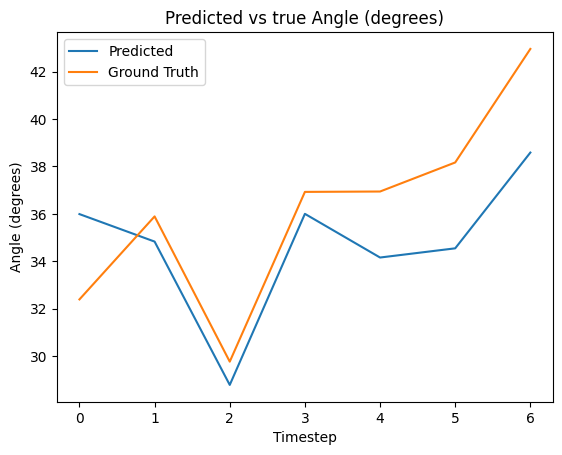

In [140]:
import math
# Evaluate on validation data
predictions = []
predicted_angles = []
true_angles = [] 
ground_truth = []

model.eval()
with torch.no_grad():
    for data, target in val_loader:
        output = model(data).cpu().numpy()
        predictions.extend(output)
        target = target.cpu().numpy()
        ground_truth.extend(target)

# Convert radians to degrees
predicted_angles = np.degrees(predictions)
predicted_angles = [angles.item() for angles in predicted_angles]
true_angles = np.degrees(ground_truth)


display(HTML("<h3><b>Result after training for {} epochs</b></h3>".format(num_epochs)))

# RMS Error
rms_error = np.sqrt(np.mean((predicted_angles - true_angles) ** 2))
print(f"RMS Error: {rms_error}")



# Plot results
import matplotlib.pyplot as plt
plt.plot(predicted_angles, label="Predicted")
plt.plot(true_angles, label="Ground Truth")
plt.xlabel("Timestep")
plt.ylabel("Angle (degrees)")
plt.title("Predicted vs true Angle (degrees)")
plt.legend()
plt.show()